In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
np.random.seed(0)
n = 100
ar_params = [0.7]
ma_params = [0.4, -0.2]
residuals = np.random.normal(0, 1, n)

In [3]:
data = [0, 0]
for i in range(2, n):
    ar_term = ar_params[0] * data[i-1]
    ma_term = ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2]
    data.append(ar_term + ma_term + residuals[i])

In [4]:
df = pd.DataFrame({'Value': data})
print(df)

       Value
0   0.000000
1   0.000000
2   0.785990
3   3.102550
4   4.739953
..       ...
95  2.160229
96  1.734016
97  2.862567
98  2.842957
99  2.085650

[100 rows x 1 columns]


In [5]:
model = ARIMA(df['Value'], order=(1, 0, 2))
results = model.fit()

In [6]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -140.937
Date:                Thu, 01 Jun 2023   AIC                            291.874
Time:                        09:14:01   BIC                            304.900
Sample:                             0   HQIC                           297.146
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1564      0.510      0.307      0.759      -0.842       1.155
ar.L1          0.7647      0.129      5.934      0.000       0.512       1.017
ma.L1          0.3757      0.158      2.382      0.0

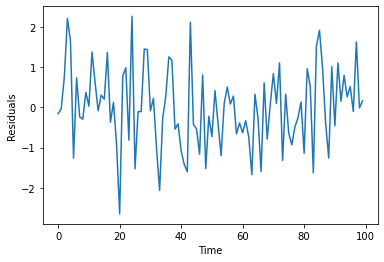

In [7]:
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

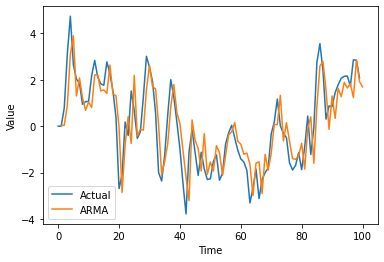

In [8]:
pred = results.predict(start=1, end=n)
plt.plot(df['Value'], label='Actual')
plt.plot(pred, label='ARMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()